In [7]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [8]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
filepath = Path('Resources/lending_data.csv')
lending_data_df = pd.read_csv(filepath)

In [9]:
# Review the DataFrame -head
lending_data_df.head(10)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
5,10100.0,7.438,50600,0.407115,4,1,20600,0
6,10300.0,7.490,51100,0.412916,4,1,21100,0
7,8800.0,6.857,45100,0.334812,3,0,15100,0
8,9300.0,7.096,47400,0.367089,3,0,17400,0
9,9700.0,7.248,48800,0.385246,4,0,18800,0


In [10]:
# Review the DataFrame- tail
lending_data_df.tail(10)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77526,18300.0,10.895,83100,0.638989,11,2,53100,1
77527,20900.0,11.988,93400,0.678801,14,3,63400,1
77528,15100.0,9.557,70500,0.574468,9,2,40500,1
77529,19300.0,11.347,87400,0.656751,12,2,57400,1
77530,19700.0,11.508,88900,0.662542,13,2,58900,1
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


In [11]:
# get the shape of the dataframe
lending_data_df.shape

(77536, 8)

In [12]:
# Check for missing data
lending_data_df.isna().sum()

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [13]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = lending_data_df.loan_status

# Separate the X variable, the features
X = lending_data_df.drop(columns = 'loan_status', axis = 1)

In [14]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [15]:
# Review the X variable DataFrame
X[:]

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [16]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [17]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [18]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Creating a Logistic Regression instance with a random_state parameter of 1
logistic_classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
logistic_classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [19]:
# Make a prediction using the testing data
logistic_predictions = logistic_classifier.predict(X_test)

# visualize the predictions against the target testing values
logistic_pred_df = pd.DataFrame({"Prediction": logistic_predictions, "Actual": y_test}).reset_index(drop = True)
logistic_pred_df.tail(10)

,Prediction,Actual
19374,0,0
19375,0,0
19376,0,0
19377,0,0
19378,0,0
19379,0,0
19380,0,0
19381,0,0
19382,0,0
19383,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [35]:
# Print the balanced_accuracy score of the model
print("Balanced accuracy score: %.3f" % balanced_accuracy_score(y_test, logistic_predictions))

Balanced accuracy score: 0.952


In [59]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, logistic_predictions)

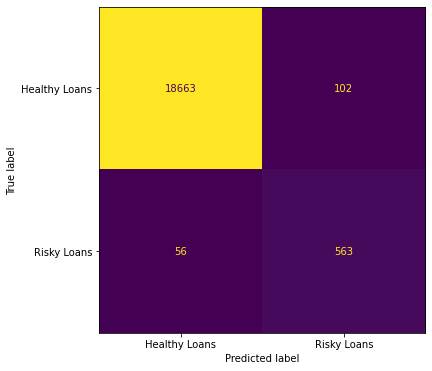

In [63]:
from sklearn.metrics import  ConfusionMatrixDisplay
# create confusion matrix from predictions
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    logistic_predictions,  
    ax=ax,
    display_labels=["Healthy Loans", "Risky Loans"], 
    colorbar=False
)

plt.savefig("Image/cm_plot", dpi=300)  # save the plot
plt.show()

In [65]:
# Print the classification report for the model
print(classification_report(y_test, logistic_predictions,
                            target_names=["Healthy Loans", "Risky Loans"]))

               precision    recall  f1-score   support

Healthy Loans       1.00      0.99      1.00     18765
  Risky Loans       0.85      0.91      0.88       619

     accuracy                           0.99     19384
    macro avg       0.92      0.95      0.94     19384
 weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model performs well according to the balanced accuracy score of approximately 95%. For the Risky loans, we get a relatively smaller recall, and precision is mixed. Because the Healthy Loan class is so much larger, the classifier focuses on getting that class right, and not the smaller Risky Loan class.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [13]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

# Fit the original training data to the random_oversampler model
# YOUR CODE HERE!

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# Count the distinct values of the resampled labels data
# YOUR CODE HERE!

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [ ]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

# Fit the model using the resampled training data
# YOUR CODE HERE!

# Make a prediction using the testing data
# YOUR CODE HERE!

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [ ]:
# Print the balanced_accuracy score of the model 
# YOUR CODE HERE!

In [ ]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!

In [ ]:
# Print the classification report for the model
# YOUR CODE HERE!

### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** YOUR ANSWER HERE!